<a href="https://colab.research.google.com/github/Prithoy/CVPR/blob/main/Mid_Assignment1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
import os
import numpy as np
import cv2
import matplotlib.pyplot as plt
from tqdm import tqdm

In [2]:
from google.colab import drive
drive.mount('/content/drive')

dataset="/content/drive/MyDrive/My dataset /animals"


Mounted at /content/drive


In [3]:
print(os.listdir(dataset))


['panda', 'images', 'animals', 'cats', 'dogs']


In [4]:
dataset = os.path.join(dataset, "animals")
print(os.listdir(dataset))

['cats', 'panda', 'dogs']


In [5]:
categories = os.listdir(dataset)
print(categories)

['cats', 'panda', 'dogs']


In [6]:
print ([os.listdir(os.path.join(dataset, category)) for category in categories])

[['cats_00008.jpg', 'cats_00009.jpg', 'cats_00016.jpg', 'cats_00014.jpg', 'cats_00015.jpg', 'cats_00019.jpg', 'cats_00002.jpg', 'cats_00011.jpg', 'cats_00026.jpg', 'cats_00027.jpg', 'cats_00013.jpg', 'cats_00005.jpg', 'cats_00024.jpg', 'cats_00029.jpg', 'cats_00006.jpg', 'cats_00018.jpg', 'cats_00012.jpg', 'cats_00003.jpg', 'cats_00023.jpg', 'cats_00021.jpg', 'cats_00010.jpg', 'cats_00001.jpg', 'cats_00004.jpg', 'cats_00025.jpg', 'cats_00020.jpg', 'cats_00007.jpg', 'cats_00017.jpg', 'cats_00028.jpg', 'cats_00022.jpg', 'cats_00298.jpg', 'cats_00203.jpg', 'cats_00260.jpg', 'cats_00090.jpg', 'cats_00133.jpg', 'cats_00230.jpg', 'cats_00061.jpg', 'cats_00068.jpg', 'cats_00279.jpg', 'cats_00302.jpg', 'cats_00059.jpg', 'cats_00042.jpg', 'cats_00047.jpg', 'cats_00277.jpg', 'cats_00267.jpg', 'cats_00292.jpg', 'cats_00088.jpg', 'cats_00249.jpg', 'cats_00212.jpg', 'cats_00201.jpg', 'cats_00313.jpg', 'cats_00304.jpg', 'cats_00235.jpg', 'cats_00076.jpg', 'cats_00222.jpg', 'cats_00185.jpg', 'cats_00

In [7]:
import random

train_data = []
max_images_per_class = 100

for index, category in enumerate(categories):
    label = index
    path = os.path.join(dataset, category)

    image_files = os.listdir(path)[:max_images_per_class]

    for img in tqdm(image_files, desc=f"Loading {category}"):
        img_path = os.path.join(path, img)
        img_bgr = cv2.imread(img_path)

        if img_bgr is None:
            continue

        img_gray = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2GRAY)
        img_array = cv2.resize(img_gray, (32, 32))
        train_data.append((img_array, label))

Loading dogs: 100%|██████████| 100/100 [00:12<00:00,  7.71it/s]


In [9]:
print(f"Total loaded samples: {len(train_data)}")

Total loaded samples: 300


In [10]:
print([train_data[i][1] for i in range(10)])

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [12]:
np.random.shuffle(train_data)

In [13]:
print([train_data[i][1] for i in range(10)])

[1, 2, 0, 2, 1, 1, 0, 0, 2, 1]


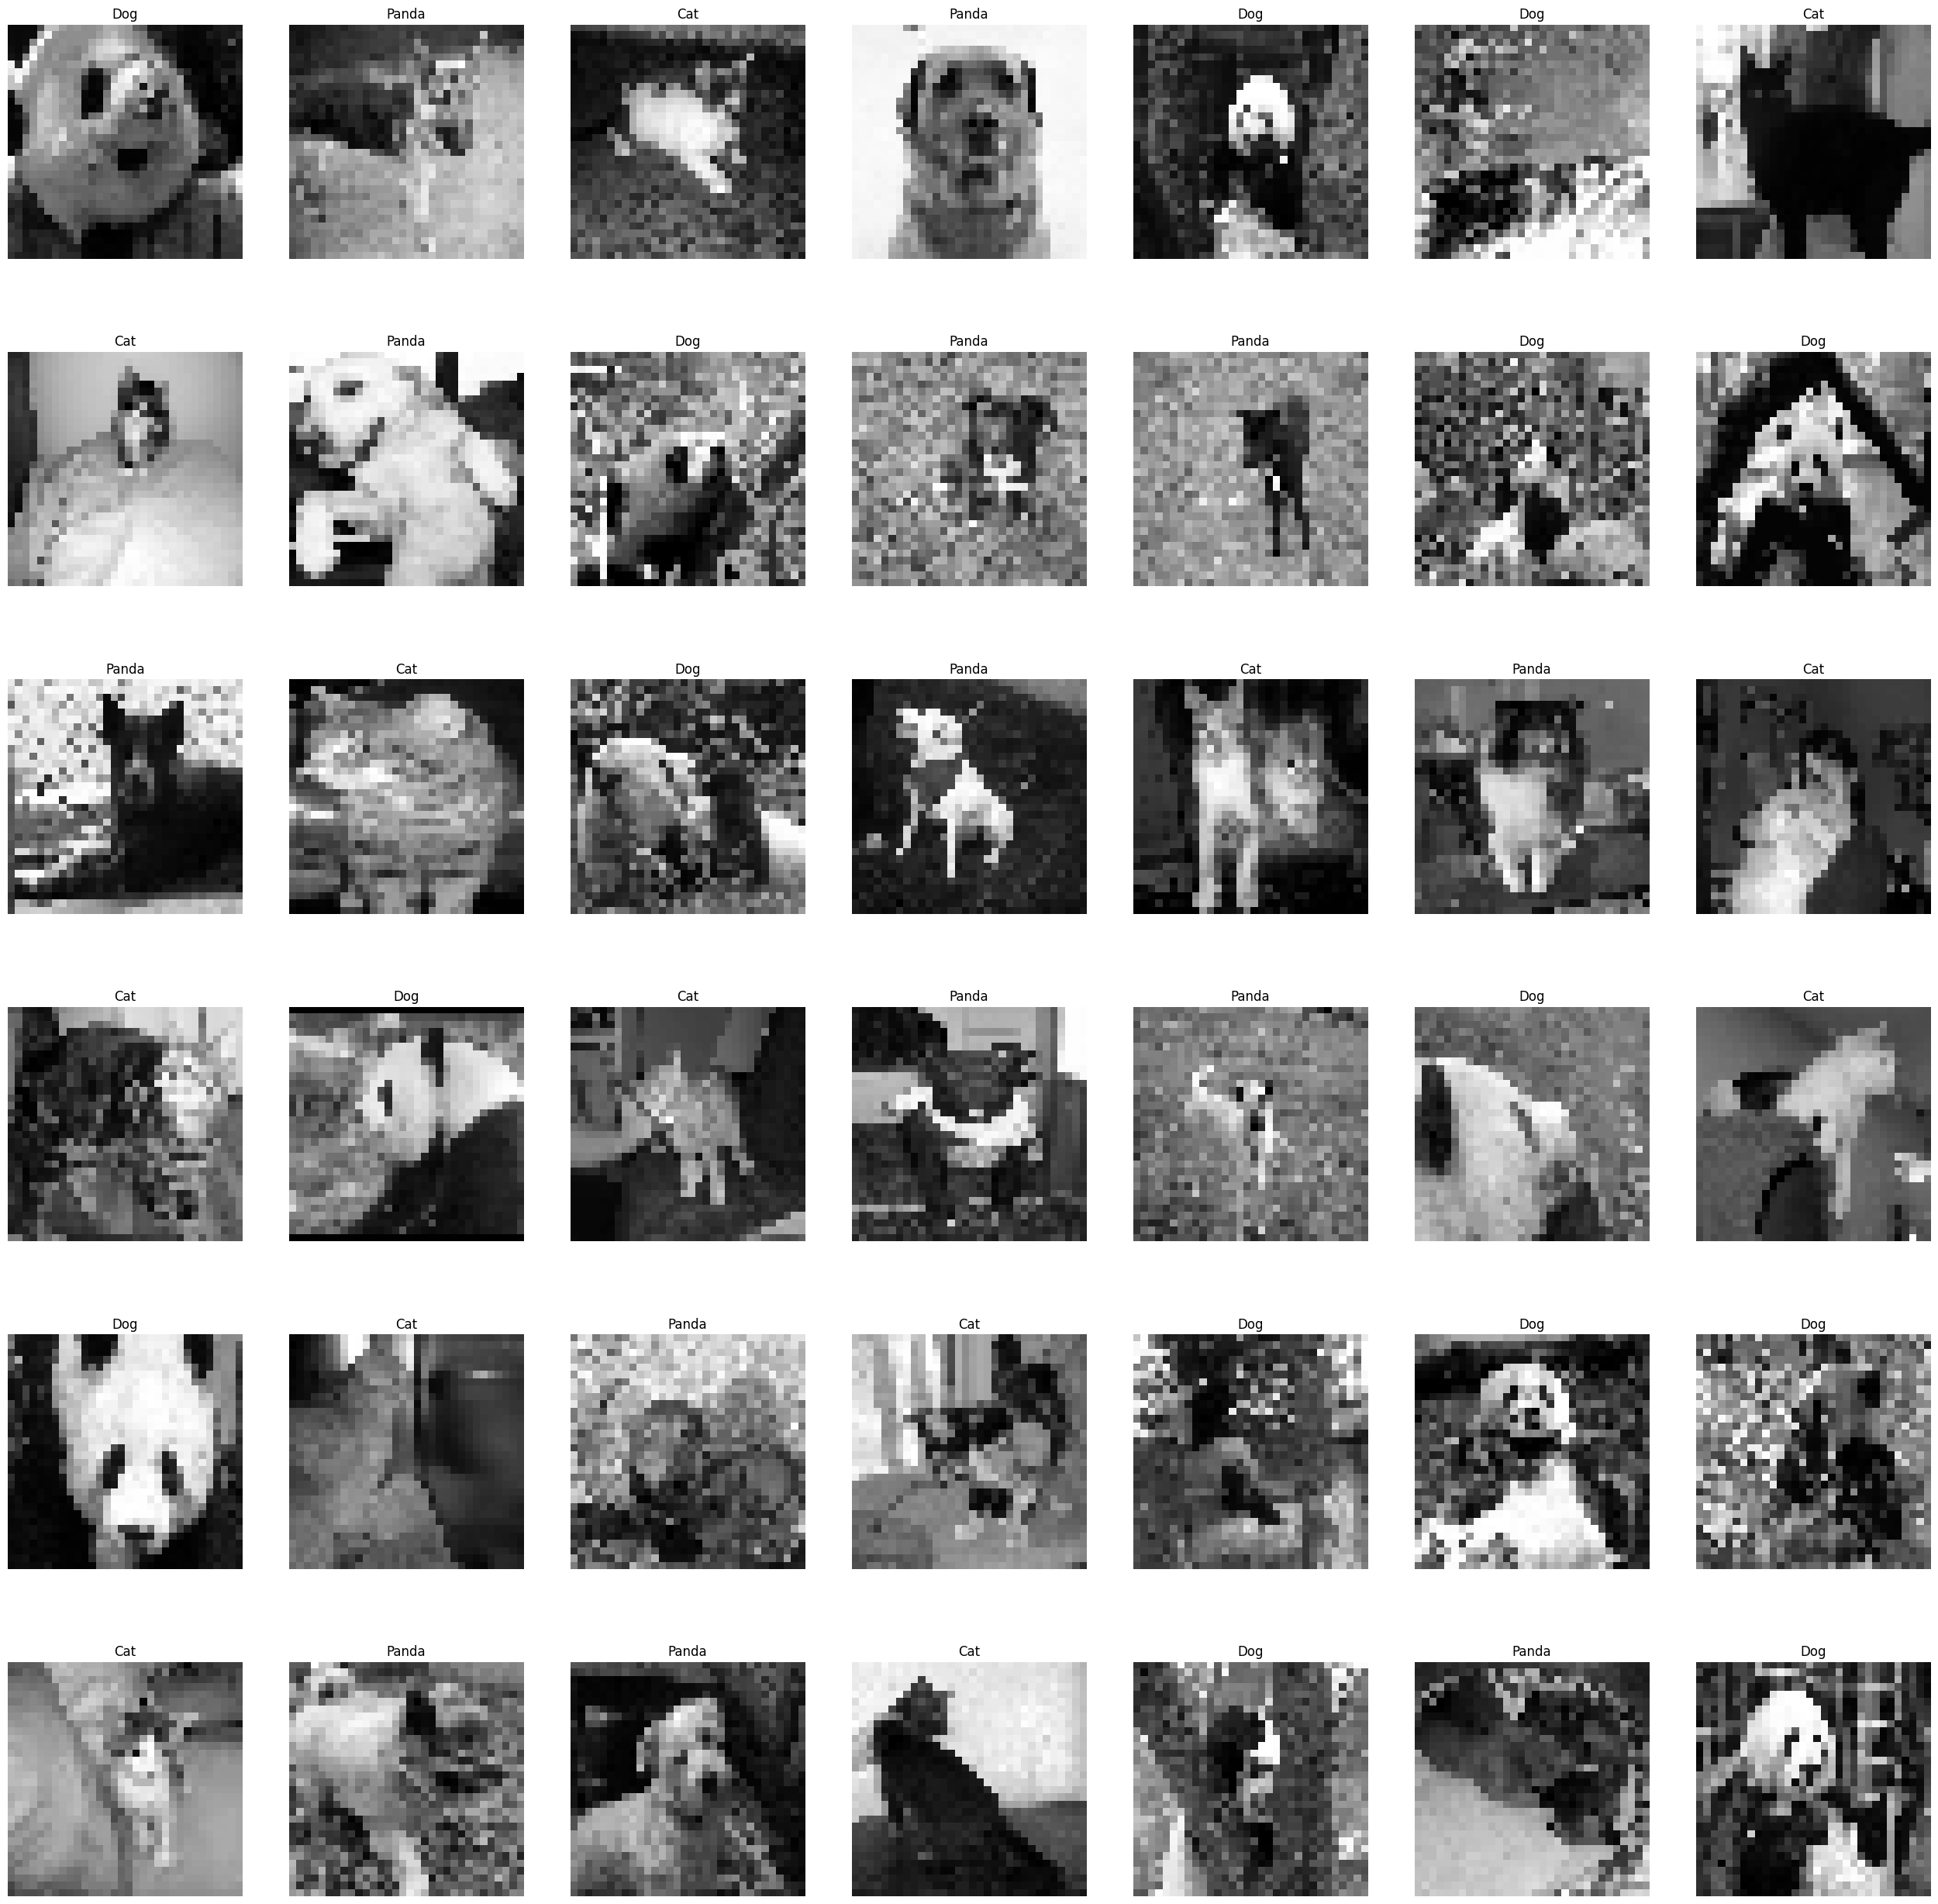

In [14]:
fig, axes = plt.subplots(6, 7, figsize=(32, 32))
label_names = ['Cat', 'Dog', 'Panda']
for (img_array, label), ax in zip(train_data, axes.flat):
    ax.imshow(img_array, cmap="gray")
    ax.set_title(label_names[label])
    ax.axis('off')

plt.show()

In [15]:
folds = [train_data[i::5] for i in range(5)]
len(folds)

5

In [16]:
for i, fold in enumerate(folds):
    labels = [label for _, label in fold]
    print(f"Fold {i+1}:")
    print(f"Labels: {labels}")
    print(f"Count: {len(fold)}")
    print(f" ")

Fold 1:
Labels: [1, 1, 2, 0, 0, 2, 2, 0, 2, 1, 2, 1, 2, 1, 2, 1, 2, 0, 0, 1, 2, 2, 0, 1, 2, 1, 2, 0, 0, 0, 0, 2, 1, 1, 2, 0, 2, 2, 2, 0, 2, 1, 0, 2, 1, 1, 1, 2, 0, 0, 1, 1, 1, 1, 1, 0, 2, 0, 1, 0]
Count: 60
 
Fold 2:
Labels: [2, 0, 2, 1, 0, 1, 0, 2, 1, 2, 0, 1, 2, 0, 2, 1, 1, 1, 0, 1, 1, 2, 2, 0, 1, 1, 2, 1, 1, 2, 0, 0, 2, 0, 0, 2, 2, 2, 0, 2, 1, 0, 2, 0, 2, 0, 1, 1, 2, 2, 2, 1, 0, 0, 1, 0, 2, 1, 0, 2]
Count: 60
 
Fold 3:
Labels: [0, 0, 1, 2, 1, 0, 1, 2, 2, 0, 1, 2, 0, 2, 2, 1, 0, 0, 0, 0, 0, 2, 0, 1, 0, 0, 2, 1, 2, 2, 1, 0, 2, 2, 1, 2, 2, 1, 2, 1, 0, 2, 1, 1, 0, 1, 1, 2, 1, 0, 0, 0, 2, 0, 1, 2, 1, 2, 1, 0]
Count: 60
 
Fold 4:
Labels: [2, 2, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 2, 1, 1, 0, 0, 0, 1, 1, 1, 2, 2, 2, 2, 2, 0, 0, 1, 0, 2, 2, 0, 0, 0, 2, 2, 1, 2, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 2, 2, 0, 1, 1, 0, 1, 0, 0]
Count: 60
 
Fold 5:
Labels: [1, 1, 2, 2, 2, 0, 1, 1, 2, 2, 0, 1, 0, 2, 2, 0, 2, 1, 2, 1, 2, 0, 1, 1, 2, 0, 2, 0, 1, 1, 0, 1, 2, 2, 1, 0, 1, 1, 2, 1, 1, 0, 2, 0, 0, 2, 1, 2, 2, 

In [17]:
def l2_distance(valid_img, train_img):
    return np.sqrt(np.sum(np.square(valid_img - train_img)))


In [18]:
def l1_distance(valid_img, train_img):
    return np.sum(np.abs(valid_img - train_img))

In [19]:
from collections import Counter

def knn_prediction(distances, k=1):
    nearest_neighbors = distances[:k]
    labels = [label for _, label in nearest_neighbors]
    label_counts = Counter(labels)
    most_common_label = label_counts.most_common(1)[0][0]

    return most_common_label

In [20]:
fold_accuracies_2 = []
avg_accuracies_2 = []

for k in range(1, 31):
  accuracies = []
  for i in range(len(folds) - 1, -1, -1):
    predictions = []

    valid_set = folds[i]
    train_set = [item for j, fold in enumerate(folds) if j != i for item in fold]

    for valid_img in valid_set:
      l2_distances = []
      for train_img in train_set:
        distance = l2_distance(valid_img[0], train_img[0])
        l2_distances.append((distance, train_img[1]))
      l2_distances.sort()
      predicted_label = knn_prediction(l2_distances, k)

      if predicted_label == valid_img[1]:
        predictions.append(1)
      else:
        predictions.append(0)

    fold_accuracy = sum(predictions) / len(predictions)
    accuracies.append(fold_accuracy)

  fold_accuracies_2.append(accuracies)
  avg_accuracy = sum(accuracies) / len(accuracies)
  avg_accuracies_2.append(avg_accuracy)
  print(f"K: {k} Average Accuracy: {avg_accuracy:.2f}")

print(f"Fold Accuracies: {fold_accuracies_2}")
print(f"Average Fold Accuracies: {avg_accuracies_2}")

K: 1 Average Accuracy: 0.38
K: 2 Average Accuracy: 0.38
K: 3 Average Accuracy: 0.40
K: 4 Average Accuracy: 0.39
K: 5 Average Accuracy: 0.39
K: 6 Average Accuracy: 0.39
K: 7 Average Accuracy: 0.41
K: 8 Average Accuracy: 0.42
K: 9 Average Accuracy: 0.43
K: 10 Average Accuracy: 0.43
K: 11 Average Accuracy: 0.42
K: 12 Average Accuracy: 0.43
K: 13 Average Accuracy: 0.43
K: 14 Average Accuracy: 0.43
K: 15 Average Accuracy: 0.45
K: 16 Average Accuracy: 0.46
K: 17 Average Accuracy: 0.43
K: 18 Average Accuracy: 0.46
K: 19 Average Accuracy: 0.46
K: 20 Average Accuracy: 0.46
K: 21 Average Accuracy: 0.47
K: 22 Average Accuracy: 0.48
K: 23 Average Accuracy: 0.46
K: 24 Average Accuracy: 0.47
K: 25 Average Accuracy: 0.48
K: 26 Average Accuracy: 0.47
K: 27 Average Accuracy: 0.46
K: 28 Average Accuracy: 0.46
K: 29 Average Accuracy: 0.47
K: 30 Average Accuracy: 0.48
Fold Accuracies: [[0.4666666666666667, 0.4, 0.36666666666666664, 0.31666666666666665, 0.36666666666666664], [0.4666666666666667, 0.4, 0.366

In [21]:
fold_accuracies_1 = []
avg_accuracies_1 = []

for k in range(1, 31):
  accuracies = []
  for i in range(len(folds) - 1, -1, -1):
    predictions = []

    valid_set = folds[i]
    train_set = [item for j, fold in enumerate(folds) if j != i for item in fold]

    for valid_img in valid_set:
      l1_distances = []
      for train_img in train_set:
        distance = l1_distance(valid_img[0], train_img[0])
        l1_distances.append((distance, train_img[1]))
      l1_distances.sort()
      predicted_label = knn_prediction(l1_distances, k)

      if predicted_label == valid_img[1]:
        predictions.append(1)
      else:
        predictions.append(0)

    fold_accuracy = sum(predictions) / len(predictions)
    accuracies.append(fold_accuracy)

  fold_accuracies_1.append(accuracies)
  avg_accuracy = sum(accuracies) / len(accuracies)
  avg_accuracies_1.append(avg_accuracy)
  print(f"K: {k} Average Accuracy: {avg_accuracy:.2f}")

print(f"Fold Accuracies: {fold_accuracies_1}")
print(f"Average Fold Accuracies: {avg_accuracies_1}")

K: 1 Average Accuracy: 0.34
K: 2 Average Accuracy: 0.34
K: 3 Average Accuracy: 0.38
K: 4 Average Accuracy: 0.35
K: 5 Average Accuracy: 0.34
K: 6 Average Accuracy: 0.33
K: 7 Average Accuracy: 0.35
K: 8 Average Accuracy: 0.35
K: 9 Average Accuracy: 0.35
K: 10 Average Accuracy: 0.34
K: 11 Average Accuracy: 0.33
K: 12 Average Accuracy: 0.34
K: 13 Average Accuracy: 0.36
K: 14 Average Accuracy: 0.35
K: 15 Average Accuracy: 0.36
K: 16 Average Accuracy: 0.36
K: 17 Average Accuracy: 0.37
K: 18 Average Accuracy: 0.38
K: 19 Average Accuracy: 0.38
K: 20 Average Accuracy: 0.37
K: 21 Average Accuracy: 0.38
K: 22 Average Accuracy: 0.37
K: 23 Average Accuracy: 0.36
K: 24 Average Accuracy: 0.34
K: 25 Average Accuracy: 0.36
K: 26 Average Accuracy: 0.37
K: 27 Average Accuracy: 0.34
K: 28 Average Accuracy: 0.33
K: 29 Average Accuracy: 0.33
K: 30 Average Accuracy: 0.32
Fold Accuracies: [[0.36666666666666664, 0.36666666666666664, 0.2833333333333333, 0.36666666666666664, 0.3], [0.36666666666666664, 0.3666666

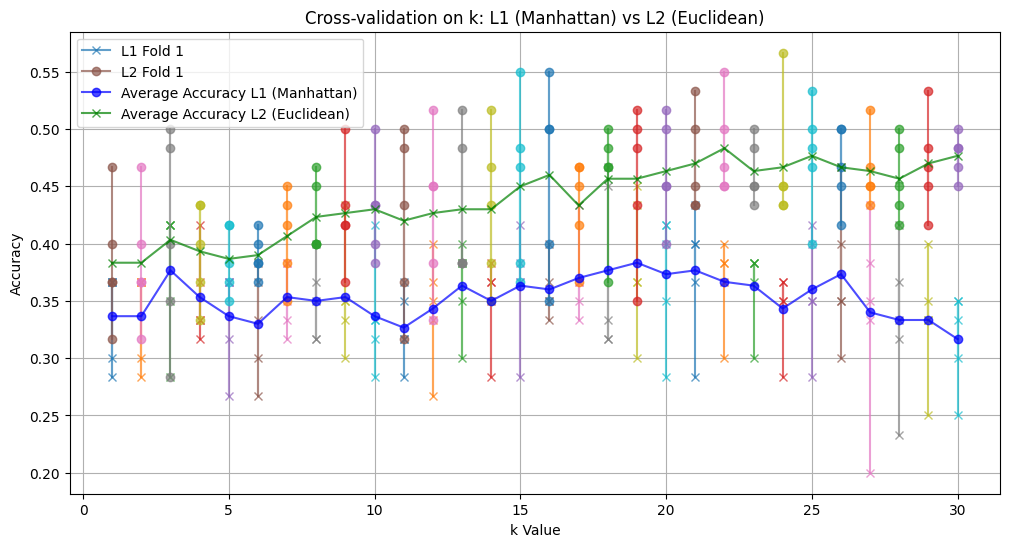

In [22]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(12, 6))

colors = plt.cm.tab10.colors

for k in range(30):
    fold_accuracy_l1 = fold_accuracies_1[k]
    plt.plot([k + 1] * len(fold_accuracy_l1), fold_accuracy_l1, linestyle='-', marker='x', alpha=0.7, color=colors[k % len(colors)], label=f'L1 Fold {k+1}' if k == 0 else "")

    fold_accuracy_l2 = fold_accuracies_2[k]
    plt.plot([k + 1] * len(fold_accuracy_l2), fold_accuracy_l2, linestyle='-', marker='o', alpha=0.7, color=colors[(k+5) % len(colors)], label=f'L2 Fold {k+1}' if k == 0 else "")

plt.plot(range(1, 31), avg_accuracies_1, color='blue', alpha=0.7, label='Average Accuracy L1 (Manhattan)', linestyle='-', marker='o')
plt.plot(range(1, 31), avg_accuracies_2, color='green', alpha=0.7, label='Average Accuracy L2 (Euclidean)', linestyle='-', marker='x')

plt.xlabel('k Value')
plt.ylabel('Accuracy')
plt.title('Cross-validation on k: L1 (Manhattan) vs L2 (Euclidean)')

plt.grid(True)
plt.legend()

plt.show()

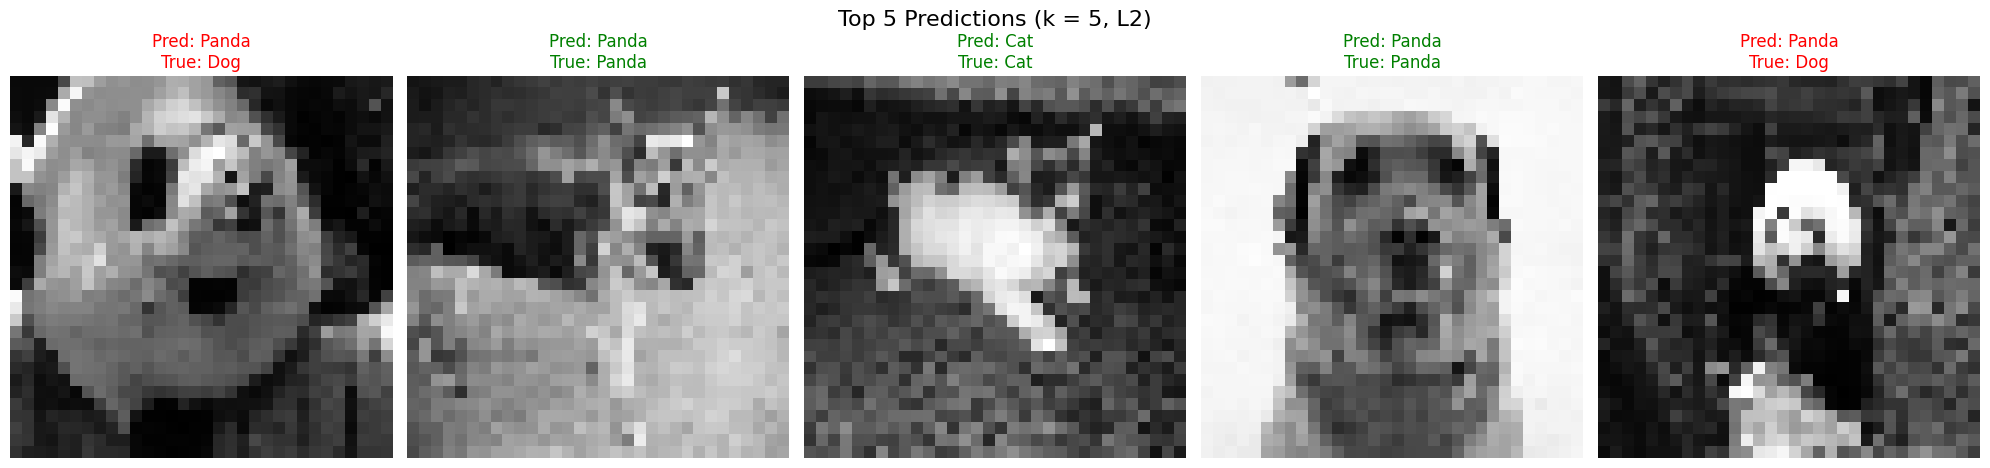

In [23]:
test_samples = train_data[:5]

k_best = 5
distance_function = l2_distance

fig, axes = plt.subplots(1, 5, figsize=(20, 5))
label_names = ['Cat', 'Dog', 'Panda']
for idx, (test_img, true_label) in enumerate(test_samples):
    distances = []
    for train_img in train_data:
        if not np.array_equal(test_img, train_img[0]):
            dist = distance_function(test_img, train_img[0])
            distances.append((dist, train_img[1]))
    distances.sort()
    predicted_label = knn_prediction(distances, k_best)

    axes[idx].imshow(test_img, cmap='gray')
    axes[idx].set_title(f"Pred: {label_names[predicted_label]}\nTrue: {label_names[true_label]}", color='green' if predicted_label == true_label else 'red')
    axes[idx].axis('off')

plt.suptitle(f"Top 5 Predictions (k = {k_best}, {'L2' if distance_function == l2_distance else 'L1'})", fontsize=16)
plt.tight_layout()
plt.show()


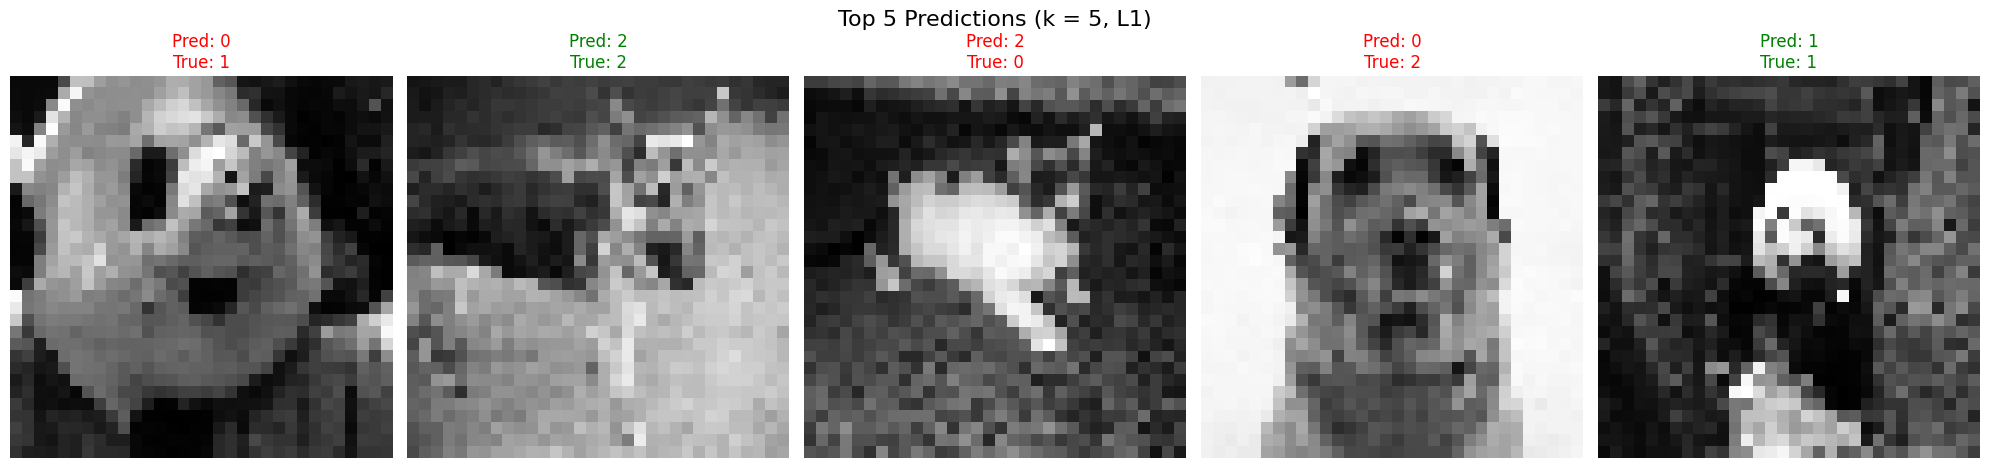

In [24]:
test_samples = train_data[:5]

k_best = 5
distance_function = l1_distance

fig, axes = plt.subplots(1, 5, figsize=(20, 5))

for idx, (test_img, true_label) in enumerate(test_samples):
    distances = []
    for train_img in train_data:
        if not np.array_equal(test_img, train_img[0]):
            dist = distance_function(test_img, train_img[0])
            distances.append((dist, train_img[1]))
    distances.sort()
    predicted_label = knn_prediction(distances, k_best)

    axes[idx].imshow(test_img, cmap='gray')
    axes[idx].set_title(f"Pred: {predicted_label}\nTrue: {true_label}", color='green' if predicted_label == true_label else 'red')
    axes[idx].axis('off')

plt.suptitle(f"Top 5 Predictions (k = {k_best}, {'L2' if distance_function == l2_distance else 'L1'})", fontsize=16)
plt.tight_layout()
plt.show()


Discussion:

The k-NN classifier using Euclidean (L2) distance consistently outperformed Manhattan (L1) distance across all values of $K$, with L2 achieving a peak accuracy of 48% at $K = 22, 25, 30$. L1 showed competitive performance at $K = 18, 19, 21$, reaching 38% accuracy. These differences highlight the impact of distance metrics on low-resolution (32×32) grayscale image classification.L2’s advantage may stem from its ability to emphasize larger pixel differences, which helps capture shape and intensity variations in animal images. In contrast, L1’s equal weighting of pixel differences may reduce its effectiveness in distinguishing visually similar classes, such as cats and dogs.Accuracy generally improved with higher $K$ values, supporting the notion that averaging over more neighbors smooths predictions and reduces noise. However, the k-NN algorithm remains computationally intensive at inference and limited by its reliance on raw pixel features.Future improvements could involve dimensionality reduction, feature extraction, or using more advanced models like Convolutional Neural Networks (CNNs) to enhance both performance and efficiency.

